# MCSD2123-01 PERLOMBONGAN DAN ALIRAN DATA BESAR (MASSIVE DATA MINING AND STREAMING)
## Assignment 3

#### Team Members: -

* Nabila Husna binti Rosli (MCS231009)
* Nur Azimah binti Mohd Salleh (MCS231011)
* Siti Norafizah Binti Ab Aziz (MCS231018)

### Main Objective:

To discover hidden patterns or clusters within your product descriptions that might correspond to meaningful categories 
(similar to your labeled categories: 
* Electronics -> **"Electrical and Electronic"**, 
* Household -> **"Housewares"**, 
* Books -> **Educational Materials**, 
* Clothing & Accessories -> **"Fashion Ensemble"**).

# Algorithm: K-Means

### Experiment Design:

1. Step 1: Feature Extraction using TF-IDF Vectorization 
2. Step 2: Dimensionality Reduction with Principal Component Analysis (PCA)
3. Step 3: Develop K-Means Clustering (Default)
4. Step 4: Tuning the Number of Clusters (K)
5. Step 5: Develop Final K-Means Model

## 1.0 Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

# Plotting Graph
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Feature Engineering - Feature Extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

## 2.0 Load Data

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('ecommerceDataset.csv', names=['category', 'description'])

# Display the first 5 rows of the DataFrame
df.head(5)

category                                        description
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...

## 3.0 Exploratorary Descriptive Analysis

### 3.1 DataFrame Shape

In [4]:
# Retrieve the shape of the DataFrame
df.shape

(50425, 2)

The dataset consists of 50,425 entries (rows) and 2 columns. 

### 3.2 DataFrame Info Summary

In [5]:
# Display summary information including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     50425 non-null  object
 1   description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


### 3.3 DataFrame Columns Unique Value

In [6]:
# Count the number of unique values in each column of the DataFrame
df.nunique()

category           4
description    27802
dtype: int64

### 3.4 'Label' Columns Distribution

In [7]:
# Count the occurrences of each unique value in the 'label' column
df['category'].value_counts()

category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

The dataset contains four distinct categories. "Household" is the largest category with 19,313 entries, followed by "Books" with 11,820 entries, "Electronics" with 10,621 entries, and "Clothing & Accessories" with 8,671 entries.

### 3.5 Missing Values Summary

In [8]:
# Count the number of missing values (NaN) in each column of the DataFrame
df.isna().sum()

category       0
description    1
dtype: int64

The analysis reveals that there is only one missing value in the "description" column of the dataset. 

### 3.6 Category (Label) Distributions

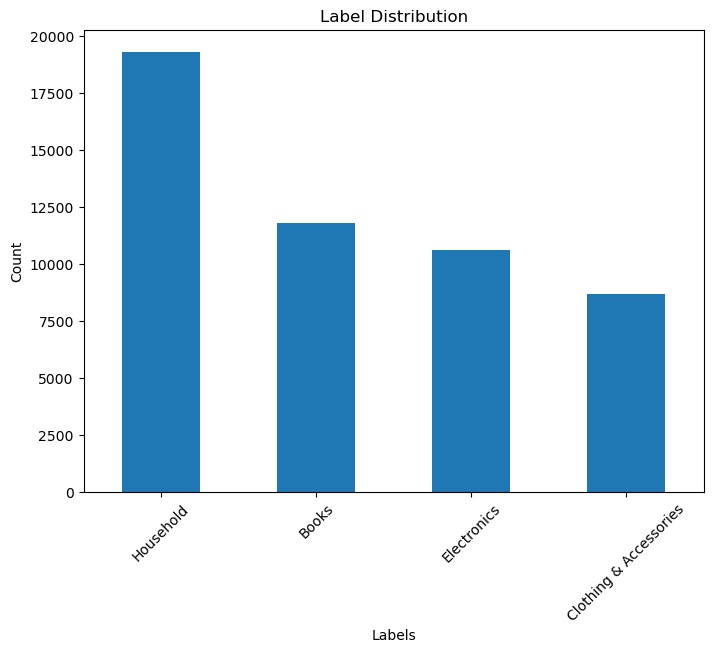

In [9]:
# Plot bar chart for label distribution
plt.figure(figsize=(8, 6))
df['category'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From the graph above, the dataset encompasses four clear categories, with "Household" being the most extensive category, comprising 19,313 entries. It is succeeded by "Books" with 11,820 entries, "Electronics" with 10,621 entries, and "Clothing & Accessories" with 8,671 entries.

### 3.7 Category Percentage Distributions

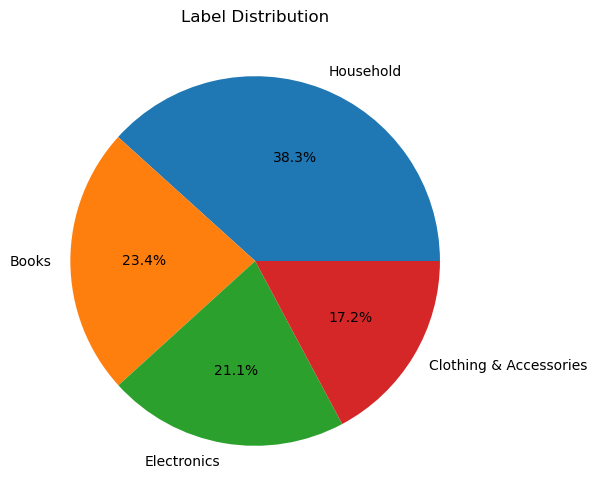

In [10]:
# Get value counts for the 'label' column
label_counts = df['category'].value_counts()

# Plot pie chart for label distribution
plt.figure(figsize=(8, 6))
label_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Label Distribution')
plt.ylabel('')
plt.show()

The pie chart illustrates that "Household" constitutes the largest portion at 38.3%, followed by "Books" at 23.4%, "Electronics" at 21.1%, and "Clothing & Accessories" at 17.2%.

### 3.8 Word Cloud for Description (Text)

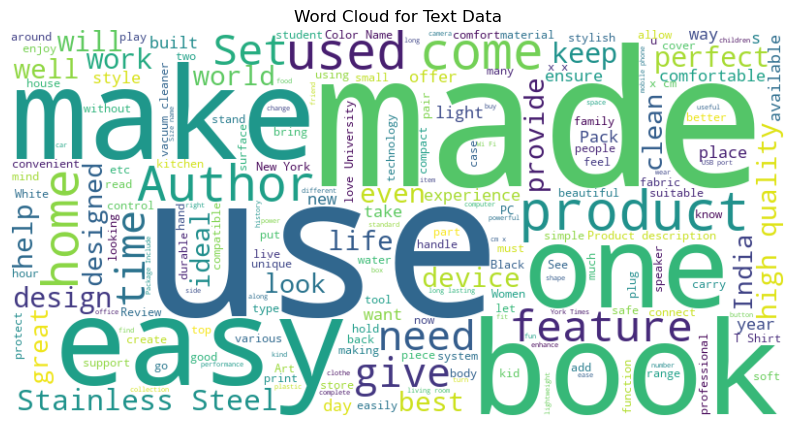

In [11]:
df.dropna(axis=0,inplace=True)

# Concatenate all text data
all_text = ' '.join(df['description'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text Data')
plt.show()

From the word cloud above, it visualize the frequency of words in the product descriptions and it turns out words like made, use, book, make and etc.. appears to be the most common words found in the description. This is because with larger font sizes indicating higher frequencies.

### 3.9 Distribution of Text Lengths

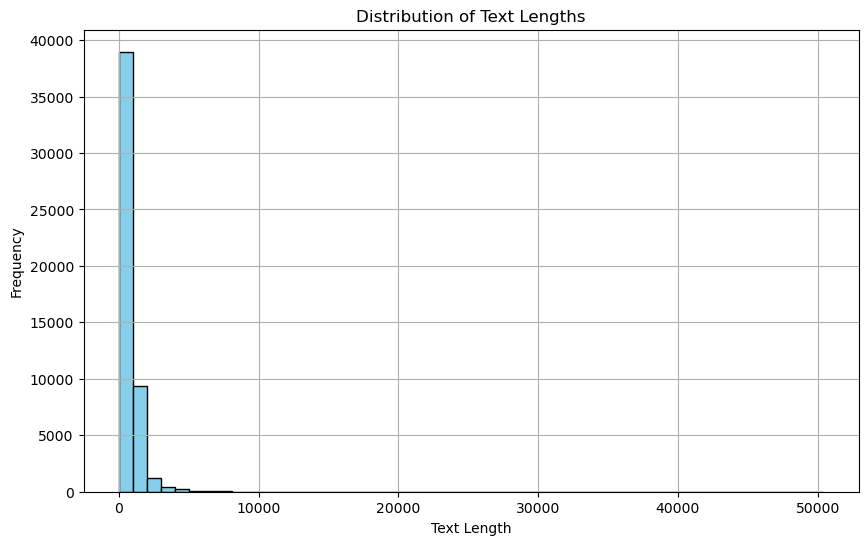

In [12]:
# Apply len function to each text entry and store the lengths in a new column
df['text_length'] = df['description'].apply(lambda x: len(str(x)))

# Plotting histogram of text lengths
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Graph above reveals that a significant portion of product descriptions falls within a certain range of character counts. This distribution helps us understand the typical length of descriptions in the dataset. 

The chart illustrates that the majority of descriptions are below 5,000 characters in length. This finding suggests that most product descriptions are relatively concise, providing essential information without excessive verbosity.

## 4.0 Data Pre-Processing

### 4.1 Handle Missing Values and Duplicates

In [13]:
# Remove rows containing missing values (NaN) 
# along the rows (axis=0) inplace
df.dropna(axis=0,inplace=True)

In [14]:
df.isna().sum()

category       0
description    0
text_length    0
dtype: int64

In [15]:
df.shape

(50424, 3)

Making sure there is no missing values in the DataFrame after data cleaning by providing a summary of the remaining missing values in each column.

In [16]:
# dropping ALL duplicate values
df.drop_duplicates(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27802 entries, 0 to 50410
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     27802 non-null  object
 1   description  27802 non-null  object
 2   text_length  27802 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 868.8+ KB


In [18]:
df.shape

(27802, 3)

### 4.2 Rename Columns

In [19]:
# Rename columns
df.rename(columns={
    'category': 'label',
    'description': 'text',
}, inplace=True)

df

label                                               text  \
0        Household  Paper Plane Design Framed Wall Hanging Motivat...   
1        Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...   
2        Household  SAF 'UV Textured Modern Art Print Framed' Pain...   
3        Household  SAF Flower Print Framed Painting (Synthetic, 1...   
4        Household  Incredible Gifts India Wooden Happy Birthday U...   
...            ...                                                ...   
50402  Electronics  Micromax Bharat 5 Plus Zero impact on visual d...   
50403  Electronics  Microsoft Lumia 550 8GB 4G Black Microsoft lum...   
50407  Electronics  Microsoft Lumia 535 (Black, 8GB) Colour:Black ...   
50408  Electronics  Karbonn Titanium Wind W4 (White) Karbonn Titan...   
50410  Electronics  Nokia Lumia 530 (Dual SIM, Grey) Colour:Grey  ...   

       text_length  
0             1338  
1              346  
2             1316  
3             1091  
4              989  
...            ...  
50402          144  
50403         1924  
50407         3931  
50408         1653  
50410         2463  

[27802 rows x 3 columns]

Next, rename the columns to align them with the standardized terminology typically used in supervised learning tasks, particularly for classification assignments.

### 4.3 Letter Case Standardization

In [20]:
# Convert the 'Review Text' column to lowercase
df['text'] = df['text'].str.lower()
df

label                                               text  \
0        Household  paper plane design framed wall hanging motivat...   
1        Household  saf 'floral' framed painting (wood, 30 inch x ...   
2        Household  saf 'uv textured modern art print framed' pain...   
3        Household  saf flower print framed painting (synthetic, 1...   
4        Household  incredible gifts india wooden happy birthday u...   
...            ...                                                ...   
50402  Electronics  micromax bharat 5 plus zero impact on visual d...   
50403  Electronics  microsoft lumia 550 8gb 4g black microsoft lum...   
50407  Electronics  microsoft lumia 535 (black, 8gb) colour:black ...   
50408  Electronics  karbonn titanium wind w4 (white) karbonn titan...   
50410  Electronics  nokia lumia 530 (dual sim, grey) colour:grey  ...   

       text_length  
0             1338  
1              346  
2             1316  
3             1091  
4              989  
...            ...  
50402          144  
50403         1924  
50407         3931  
50408         1653  
50410         2463  

[27802 rows x 3 columns]

### 4.4 Tokenization

In [21]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nabila\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# Tokenize the 'Review Text' column
df['tokens'] = df['text'].apply(word_tokenize)
df

label                                               text  \
0        Household  paper plane design framed wall hanging motivat...   
1        Household  saf 'floral' framed painting (wood, 30 inch x ...   
2        Household  saf 'uv textured modern art print framed' pain...   
3        Household  saf flower print framed painting (synthetic, 1...   
4        Household  incredible gifts india wooden happy birthday u...   
...            ...                                                ...   
50402  Electronics  micromax bharat 5 plus zero impact on visual d...   
50403  Electronics  microsoft lumia 550 8gb 4g black microsoft lum...   
50407  Electronics  microsoft lumia 535 (black, 8gb) colour:black ...   
50408  Electronics  karbonn titanium wind w4 (white) karbonn titan...   
50410  Electronics  nokia lumia 530 (dual sim, grey) colour:grey  ...   

       text_length                                             tokens  
0             1338  [paper, plane, design, framed, wall, hanging, ...  
1              346  [saf, 'floral, ', framed, painting, (, wood, ,...  
2             1316  [saf, 'uv, textured, modern, art, print, frame...  
3             1091  [saf, flower, print, framed, painting, (, synt...  
4              989  [incredible, gifts, india, wooden, happy, birt...  
...            ...                                                ...  
50402          144  [micromax, bharat, 5, plus, zero, impact, on, ...  
50403         1924  [microsoft, lumia, 550, 8gb, 4g, black, micros...  
50407         3931  [microsoft, lumia, 535, (, black, ,, 8gb, ), c...  
50408         1653  [karbonn, titanium, wind, w4, (, white, ), kar...  
50410         2463  [nokia, lumia, 530, (, dual, sim, ,, grey, ), ...  

[27802 rows x 4 columns]

### 4.5 Punctuation Removal

In [23]:
import string

# Function to remove punctuation and numbers
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation + string.digits)
    # Remove punctuation and numbers
    text = [word.translate(translator) for word in text]
    # Remove empty strings or whitespace-only strings
    text = [word for word in text if word.strip()]
    return text

# Apply the function to the "Review Text" column
df['noPunc tokens'] = df['tokens'].apply(remove_punctuation)

df

label                                               text  \
0        Household  paper plane design framed wall hanging motivat...   
1        Household  saf 'floral' framed painting (wood, 30 inch x ...   
2        Household  saf 'uv textured modern art print framed' pain...   
3        Household  saf flower print framed painting (synthetic, 1...   
4        Household  incredible gifts india wooden happy birthday u...   
...            ...                                                ...   
50402  Electronics  micromax bharat 5 plus zero impact on visual d...   
50403  Electronics  microsoft lumia 550 8gb 4g black microsoft lum...   
50407  Electronics  microsoft lumia 535 (black, 8gb) colour:black ...   
50408  Electronics  karbonn titanium wind w4 (white) karbonn titan...   
50410  Electronics  nokia lumia 530 (dual sim, grey) colour:grey  ...   

       text_length                                             tokens  \
0             1338  [paper, plane, design, framed, wall, hanging, ...   
1              346  [saf, 'floral, ', framed, painting, (, wood, ,...   
2             1316  [saf, 'uv, textured, modern, art, print, frame...   
3             1091  [saf, flower, print, framed, painting, (, synt...   
4              989  [incredible, gifts, india, wooden, happy, birt...   
...            ...                                                ...   
50402          144  [micromax, bharat, 5, plus, zero, impact, on, ...   
50403         1924  [microsoft, lumia, 550, 8gb, 4g, black, micros...   
50407         3931  [microsoft, lumia, 535, (, black, ,, 8gb, ), c...   
50408         1653  [karbonn, titanium, wind, w4, (, white, ), kar...   
50410         2463  [nokia, lumia, 530, (, dual, sim, ,, grey, ), ...   

                                           noPunc tokens  
0      [paper, plane, design, framed, wall, hanging, ...  
1      [saf, floral, framed, painting, wood, inch, x,...  
2      [saf, uv, textured, modern, art, print, framed...  
3      [saf, flower, print, framed, painting, synthet...  
4      [incredible, gifts, india, wooden, happy, birt...  
...                                                  ...  
50402  [micromax, bharat, plus, zero, impact, on, vis...  
50403  [microsoft, lumia, gb, g, black, microsoft, lu...  
50407  [microsoft, lumia, black, gb, colour, black, p...  
50408  [karbonn, titanium, wind, w, white, karbonn, t...  
50410  [nokia, lumia, dual, sim, grey, colour, grey, ...  

[27802 rows x 5 columns]

### 4.6 Stop Words Removal

In [24]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nabila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Define a function to remove stop words from tokens
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

# Apply the function to each row in the 'Tokenized Review' column
df['noStopW tokens'] = df['noPunc tokens'].apply(remove_stopwords)

# Print the result
df

label                                               text  \
0        Household  paper plane design framed wall hanging motivat...   
1        Household  saf 'floral' framed painting (wood, 30 inch x ...   
2        Household  saf 'uv textured modern art print framed' pain...   
3        Household  saf flower print framed painting (synthetic, 1...   
4        Household  incredible gifts india wooden happy birthday u...   
...            ...                                                ...   
50402  Electronics  micromax bharat 5 plus zero impact on visual d...   
50403  Electronics  microsoft lumia 550 8gb 4g black microsoft lum...   
50407  Electronics  microsoft lumia 535 (black, 8gb) colour:black ...   
50408  Electronics  karbonn titanium wind w4 (white) karbonn titan...   
50410  Electronics  nokia lumia 530 (dual sim, grey) colour:grey  ...   

       text_length                                             tokens  \
0             1338  [paper, plane, design, framed, wall, hanging, ...   
1              346  [saf, 'floral, ', framed, painting, (, wood, ,...   
2             1316  [saf, 'uv, textured, modern, art, print, frame...   
3             1091  [saf, flower, print, framed, painting, (, synt...   
4              989  [incredible, gifts, india, wooden, happy, birt...   
...            ...                                                ...   
50402          144  [micromax, bharat, 5, plus, zero, impact, on, ...   
50403         1924  [microsoft, lumia, 550, 8gb, 4g, black, micros...   
50407         3931  [microsoft, lumia, 535, (, black, ,, 8gb, ), c...   
50408         1653  [karbonn, titanium, wind, w4, (, white, ), kar...   
50410         2463  [nokia, lumia, 530, (, dual, sim, ,, grey, ), ...   

                                           noPunc tokens  \
0      [paper, plane, design, framed, wall, hanging, ...   
1      [saf, floral, framed, painting, wood, inch, x,...   
2      [saf, uv, textured, modern, art, print, framed...   
3      [saf, flower, print, framed, painting, synthet...   
4      [incredible, gifts, india, wooden, happy, birt...   
...                                                  ...   
50402  [micromax, bharat, plus, zero, impact, on, vis...   
50403  [microsoft, lumia, gb, g, black, microsoft, lu...   
50407  [microsoft, lumia, black, gb, colour, black, p...   
50408  [karbonn, titanium, wind, w, white, karbonn, t...   
50410  [nokia, lumia, dual, sim, grey, colour, grey, ...   

                                          noStopW tokens  
0      [paper, plane, design, framed, wall, hanging, ...  
1      [saf, floral, framed, painting, wood, inch, x,...  
2      [saf, uv, textured, modern, art, print, framed...  
3      [saf, flower, print, framed, painting, synthet...  
4      [incredible, gifts, india, wooden, happy, birt...  
...                                                  ...  
50402  [micromax, bharat, plus, zero, impact, visual,...  
50403  [microsoft, lumia, gb, g, black, microsoft, lu...  
50407  [microsoft, lumia, black, gb, colour, black, p...  
50408  [karbonn, titanium, wind, w, white, karbonn, t...  
50410  [nokia, lumia, dual, sim, grey, colour, grey, ...  

[27802 rows x 6 columns]

### 4.7 Lemmatization

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nabila\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Initialize WordNet lemmatizer stemmer
lemmatizer = WordNetLemmatizer()
# Define a function to lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization to each row in the 'NoPunc Tokenized Review' column
df['lemmatized tokens'] = df['noStopW tokens'].apply(lemmatize_tokens)

# Join the lemmatized words back into a single string
df['lemmatized tokens'] = df['lemmatized tokens'].apply(lambda tokens: ' '.join(tokens))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nabila\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
df.head()

label                                               text  text_length  \
0  Household  paper plane design framed wall hanging motivat...         1338   
1  Household  saf 'floral' framed painting (wood, 30 inch x ...          346   
2  Household  saf 'uv textured modern art print framed' pain...         1316   
3  Household  saf flower print framed painting (synthetic, 1...         1091   
4  Household  incredible gifts india wooden happy birthday u...          989   

                                              tokens  \
0  [paper, plane, design, framed, wall, hanging, ...   
1  [saf, 'floral, ', framed, painting, (, wood, ,...   
2  [saf, 'uv, textured, modern, art, print, frame...   
3  [saf, flower, print, framed, painting, (, synt...   
4  [incredible, gifts, india, wooden, happy, birt...   

                                       noPunc tokens  \
0  [paper, plane, design, framed, wall, hanging, ...   
1  [saf, floral, framed, painting, wood, inch, x,...   
2  [saf, uv, textured, modern, art, print, framed...   
3  [saf, flower, print, framed, painting, synthet...   
4  [incredible, gifts, india, wooden, happy, birt...   

                                      noStopW tokens  \
0  [paper, plane, design, framed, wall, hanging, ...   
1  [saf, floral, framed, painting, wood, inch, x,...   
2  [saf, uv, textured, modern, art, print, framed...   
3  [saf, flower, print, framed, painting, synthet...   
4  [incredible, gifts, india, wooden, happy, birt...   

                                   lemmatized tokens  
0  paper plane design framed wall hanging motivat...  
1  saf floral framed painting wood inch x inch sp...  
2  saf uv textured modern art print framed painti...  
3  saf flower print framed painting synthetic inc...  
4  incredible gift india wooden happy birthday un...

In [32]:
# FOR CSV
# Define the path where the cleaned DataFrame want to be saved
output_path = 'cleaned_data_new.csv'

# Export the DataFrame to a CSV file
df.to_csv(output_path, index=False)

# Display the exported path
print(f"Cleaned csv data has been exported to: {output_path}")

# FOR XLSX
# Define the path where the cleaned DataFrame wants to be saved
output_path = 'cleaned_data_new.xlsx'

# Export the DataFrame to an Excel file
df.to_excel(output_path, index=False)

# Display the exported path
print(f"Cleaned xlsx data has been exported to: {output_path}")

Cleaned csv data has been exported to: cleaned_data_new.csv
Cleaned xlsx data has been exported to: cleaned_data_new.xlsx


In [33]:
# Read the CSV file into a DataFrame
df = pd.read_csv('cleaned_data_new.csv')

# Display the first 5 rows of the DataFrame
df.head(5)

label                                               text  text_length  \
0  Household  paper plane design framed wall hanging motivat...         1338   
1  Household  saf 'floral' framed painting (wood, 30 inch x ...          346   
2  Household  saf 'uv textured modern art print framed' pain...         1316   
3  Household  saf flower print framed painting (synthetic, 1...         1091   
4  Household  incredible gifts india wooden happy birthday u...          989   

                                              tokens  \
0  ['paper', 'plane', 'design', 'framed', 'wall',...   
1  ['saf', "'floral", "'", 'framed', 'painting', ...   
2  ['saf', "'uv", 'textured', 'modern', 'art', 'p...   
3  ['saf', 'flower', 'print', 'framed', 'painting...   
4  ['incredible', 'gifts', 'india', 'wooden', 'ha...   

                                       noPunc tokens  \
0  ['paper', 'plane', 'design', 'framed', 'wall',...   
1  ['saf', 'floral', 'framed', 'painting', 'wood'...   
2  ['saf', 'uv', 'textured', 'modern', 'art', 'pr...   
3  ['saf', 'flower', 'print', 'framed', 'painting...   
4  ['incredible', 'gifts', 'india', 'wooden', 'ha...   

                                      noStopW tokens  \
0  ['paper', 'plane', 'design', 'framed', 'wall',...   
1  ['saf', 'floral', 'framed', 'painting', 'wood'...   
2  ['saf', 'uv', 'textured', 'modern', 'art', 'pr...   
3  ['saf', 'flower', 'print', 'framed', 'painting...   
4  ['incredible', 'gifts', 'india', 'wooden', 'ha...   

                                   lemmatized tokens  
0  paper plane design framed wall hanging motivat...  
1  saf floral framed painting wood inch x inch sp...  
2  saf uv textured modern art print framed painti...  
3  saf flower print framed painting synthetic inc...  
4  incredible gift india wooden happy birthday un...

In [34]:
df.shape

(27802, 7)

27802 rows: This represents the number of data points (descriptions + reviews) in the dataset.

7 columns: These columns likely contain features or information associated with each review/description.

## WordCloud - Most Frequent Words

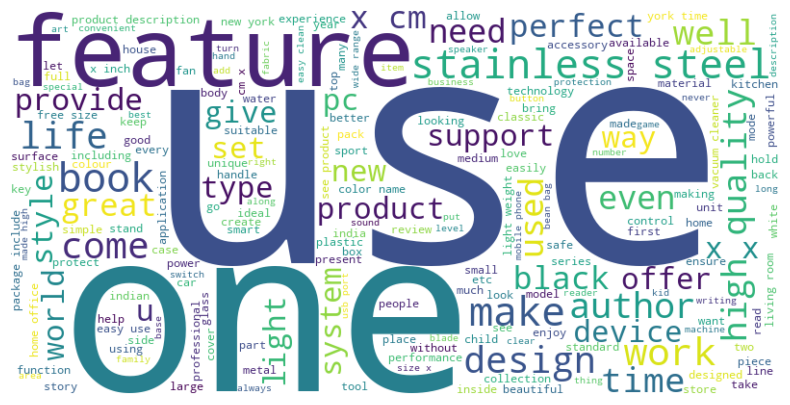

In [35]:
from wordcloud import WordCloud

# Concatenate all text in the 'lemmatized tokens' column into a single string
text = ' '.join(df['lemmatized tokens'])

# Create a WordCloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

# Experiment Design for K-Means Starts Here !

## Step 1: Feature Extraction using TF-IDF Vectorization
## 5.0 Feature Engineering

### 5.1 Vectorization using TF-IDF

We use TF-IDF to change our text into numbers that ML can understand better. TF-IDF will looks at how often the words appear in each piece of text (description) and across all the texts (descriptions). Words that appear a lot in one piece of text but not in many others get higher numbers, showing they are more important for telling texts apart. 

In [100]:
# To print the entire array
np.set_printoptions(threshold=np.inf)

# Vectorizing the Lemmatized Tokens using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(df['lemmatized tokens'])

tfidf

<27802x78811 sparse matrix of type '<class 'numpy.float64'>'
	with 1427868 stored elements in Compressed Sparse Row format>

In [101]:
tfidf.shape

(27802, 78811)

In [102]:
print(tfidf)

  (0, 49809)	0.053362181738752464
  (0, 51808)	0.08520596901723844
  (0, 17382)	0.034064896673215765
  (0, 25815)	0.09267862558819659
  (0, 74511)	0.10073379049387406
  (0, 29590)	0.061984415038903666
  (0, 44306)	0.09106671761051961
  (0, 47816)	0.09766329539815387
  (0, 16638)	0.05478398533922408
  (0, 3669)	0.053947162979922046
  (0, 53605)	0.4246918206974152
  (0, 32976)	0.04060666655986418
  (0, 60990)	0.03560948626951227
  (0, 49543)	0.4487616986122692
  (0, 40396)	0.032595455368980154
  (0, 67410)	0.07603067523714907
  (0, 25811)	0.05845756403127456
  (0, 72973)	0.13381219006528208
  (0, 68544)	0.07831870609792976
  (0, 27594)	0.08156673879974154
  (0, 44762)	0.05905970084660282
  (0, 20804)	0.05893263253153058
  (0, 4276)	0.09828343430857857
  (0, 70057)	0.07194420429156397
  (0, 64218)	0.05219838394151215
  :	:
  (27801, 56183)	0.04180052149641906
  (27801, 4732)	0.039211204177655216
  (27801, 16567)	0.045649972390651015
  (27801, 62274)	0.4023774075887895
  (27801, 33933)	0.0

In [103]:
# After fitting the TF-IDF vectorizer, retrieve the vocabulary mapping
feature_names = tfidf_vectorizer.get_feature_names_out()

# Example - To find the word corresponding to a specific column index (eg.: 16638)
word_at_index= feature_names[16638]
print("Word at column index:", word_at_index)

Word at column index: decor


In [104]:
# Accessing the vocabulary
vocabulary = tfidf_vectorizer.vocabulary_

# Print the first 15 terms and their indices
for term, index in list(vocabulary.items())[:15]: 
    print(f"Term: '{term}', Index: {index}")

Term: 'paper', Index: 49809
Term: 'plane', Index: 51808
Term: 'design', Index: 17382
Term: 'framed', Index: 25815
Term: 'wall', Index: 74511
Term: 'hanging', Index: 29590
Term: 'motivational', Index: 44306
Term: 'office', Index: 47816
Term: 'decor', Index: 16638
Term: 'art', Index: 3669
Term: 'print', Index: 53605
Term: 'inch', Index: 32976
Term: 'set', Index: 60990
Term: 'painting', Index: 49543
Term: 'made', Index: 40396


## Step 2: Dimensionality Reduction with TruncatedSVD

### PCA on SVD-Reduced Data

SVD-transformed was implemeted on the data to reduce its dimensionality for visualization purposes.
SVD compresses the data while preserving most of its variance. PCA takes the compressed data from SVD and projects it into a lower dimension suitable for plotting clusters in a scatter plot below.

In [105]:
from sklearn.decomposition import TruncatedSVD

# Perform TruncatedSVD on tfidf
n_components = 5
svd = TruncatedSVD(n_components=n_components)
tfidf_svd = svd.fit_transform(tfidf)

print(tfidf_svd)

[[ 1.66023924e-01  1.41828297e-02  4.07916056e-04  4.73493402e-02
   1.04899421e-02]
 [ 1.17674628e-01 -1.06510551e-02  3.41683746e-03  4.13374096e-02
   4.86884195e-03]
 [ 1.68224495e-01 -8.98887810e-03 -2.25617183e-02  9.35602767e-02
   4.72297244e-03]
 [ 1.75567004e-01 -8.80205358e-03 -1.73880473e-02  8.91257474e-02
   5.83158554e-03]
 [ 1.71437793e-01 -3.30147907e-03 -5.99298409e-03  7.19103786e-02
   2.54384209e-02]
 [ 1.96650427e-01 -1.09289212e-02 -4.45042692e-02  1.21939142e-01
   4.33179015e-03]
 [ 1.81028875e-01  1.23655542e-02 -2.68427825e-03  2.64874082e-02
   1.44586985e-03]
 [ 1.54548540e-01 -3.72597285e-03 -1.53835025e-02  8.02527547e-02
   1.72458159e-02]
 [ 1.47527198e-01 -9.79155956e-04 -1.81067683e-02  8.06923517e-02
   1.67048635e-02]
 [ 1.72711722e-01  1.23777055e-02 -1.54662994e-02  4.17579521e-02
  -2.31012105e-02]
 [ 1.39216584e-01 -1.25106372e-02 -4.59403287e-02  7.78507141e-02
  -1.53760442e-02]
 [ 9.74633495e-02 -2.25086428e-02 -2.56952800e-02  1.08584055e-01

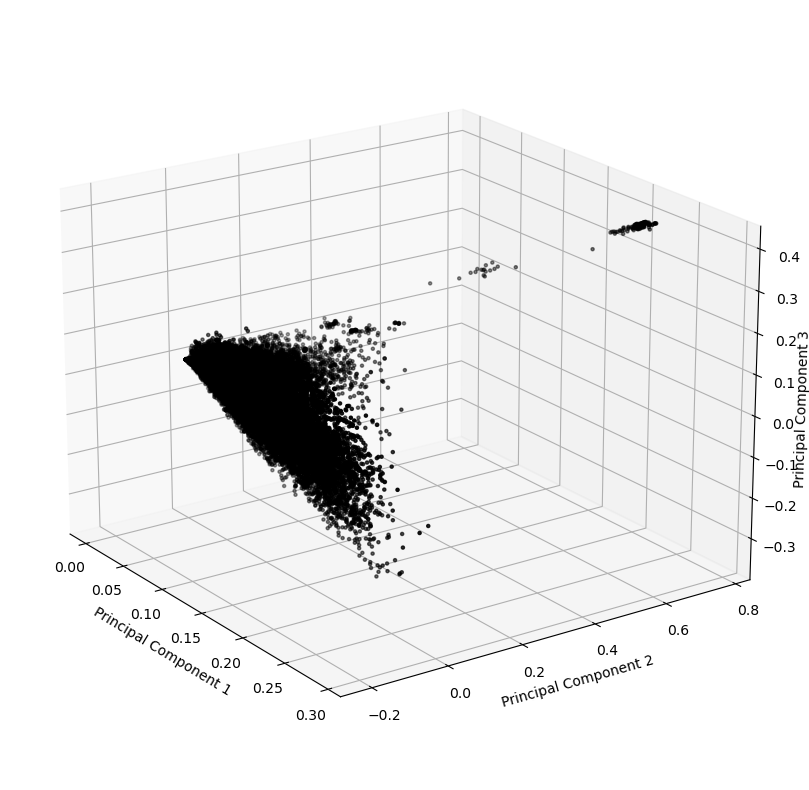

In [106]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three principal components
x = tfidf_svd[:, 0]
y = tfidf_svd[:, 1]
z = tfidf_svd[:, 2]

# Customize the marker style, color, and other plot properties as needed
ax.scatter(x, y, z, c='black', marker='.')

# Label the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Adjust label visibility
ax.zaxis.labelpad = -2
ax.view_init(elev=20., azim=-35)
plt.tight_layout();

## Step 3: K-Means Clustering Development
## 6.0 Model Building

The **main goal** in this case is to automatically discover hidden patterns or clusters within your product descriptions that might correspond to meaningful categories (similar to your labeled categories: Electronics, Household, Books, Clothing & Accessories). 

We want to discover clusters that align with some or all of your existing categories, suggesting the descriptions within those clusters share similar characteristics.

There's also a chance unsupervised learning might reveal previously unknown categories not defined in those four existing labels. These could be niche categories or variations within existing ones (e.g., "Kitchen Appliances" within "Household"). By analyzing the clusters and the descriptions within them, we might gain valuable insights into how the products are described and potentially refine those existing categories.

## 6.1 K-Means

In [107]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# Data normalization
normalized_data = normalize(tfidf_svd)

kmeans = KMeans(n_clusters=5, init='k-means++', n_init=12)
kmeans.fit(normalized_data)

KMeans(n_clusters=5, n_init=12)

In [108]:
# The clustering labels for each point in the dataset
clusterlabels = kmeans.labels_

# The cluster centers
centers = kmeans.cluster_centers_

### Extraction of Top Keywords for Each Cluster

In [109]:
# Inverse transform the SVD-reduced cluster centers back to the original TF-IDF feature space
original_space_centers = svd.inverse_transform(centers)

# Get feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to store cluster centers with feature names
df_centers = pd.DataFrame(original_space_centers, columns=feature_names)

# Define the number of top keywords to extract
top_n = 10

# Initialize a dictionary to store the top keywords for each cluster
top_keywords = {}

for i in range(df_centers.shape[0]):
    # Sort the words by their importance in the cluster center
    sorted_keywords = df_centers.iloc[i].sort_values(ascending=False)
    
    # Get the top n keywords
    top_keywords[i] = sorted_keywords.head(top_n).index.tolist()

# Output the top keywords for each cluster
top_keywords

{0: ['cotton',
  'woman',
  'men',
  'wear',
  'fabric',
  'fit',
  'boy',
  'girl',
  'made',
  'pack'],
 1: ['product',
  'cm',
  'size',
  'set',
  'home',
  'inch',
  'black',
  'color',
  'steel',
  'easy'],
 2: ['book',
  'author',
  'time',
  'life',
  'new',
  'review',
  'university',
  'world',
  'one',
  'story'],
 3: ['steel',
  'set',
  'stainless',
  'cm',
  'home',
  'table',
  'product',
  'color',
  'kitchen',
  'size'],
 4: ['usb',
  'bluetooth',
  'cable',
  'speaker',
  'camera',
  'device',
  'audio',
  'mm',
  'power',
  'wireless']}

## 6.1 Measuring Dinstance
### 6.1.1 Euclidean Distance

In [110]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(normalized_data, clusterlabels)
print("Silhouette Score (K-Means):", silhouette_kmeans)

Silhouette Score (K-Means): 0.468108848163569


### 6.1.2 Cosine Distance

Cosine distance focus on the angle between 2 points. 

In [111]:
silhouette_kmeans_cosine = silhouette_score(normalized_data, clusterlabels, metric="cosine")
print("Silhouette Score Cosine (K-Means):", silhouette_kmeans_cosine)

Silhouette Score Cosine (K-Means): 0.6449090069750344


### 6.1.3 Manhattan Distance

In [112]:
silhouette_kmeans_manhattan = silhouette_score(normalized_data, clusterlabels, metric="manhattan")
print("Silhouette Score Manhattan (K-Means):", silhouette_kmeans_manhattan)

Silhouette Score Manhattan (K-Means): 0.4556706846524101


## Plotting Scatter Plot

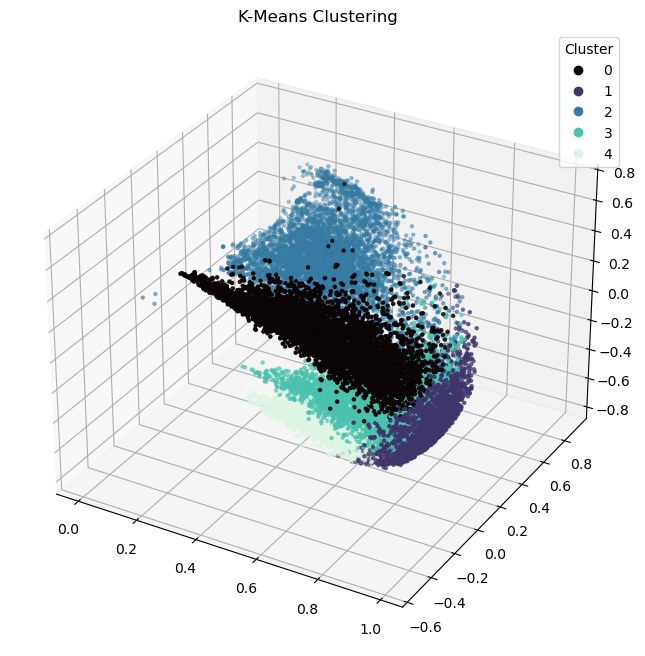

In [113]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three principal components
x = normalized_data[:, 0]
y = normalized_data[:, 1]
z = normalized_data[:, 2]

# Customize the marker style, color, and other plot properties as needed
scatter = ax.scatter(x, y, z, c=clusterlabels, cmap='mako', marker='.')

# Scatter plot for cluster centers
center_x = centers[:, 0]
center_y = centers[:, 1]
center_z = centers[:, 2]
ax.scatter(center_x, center_y, center_z, c='blue', s=100, alpha=1.0, marker='X', label='Centers', zorder=3)

# Set the title
ax.set_title('K-Means Clustering')

# Create a legend
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Cluster");

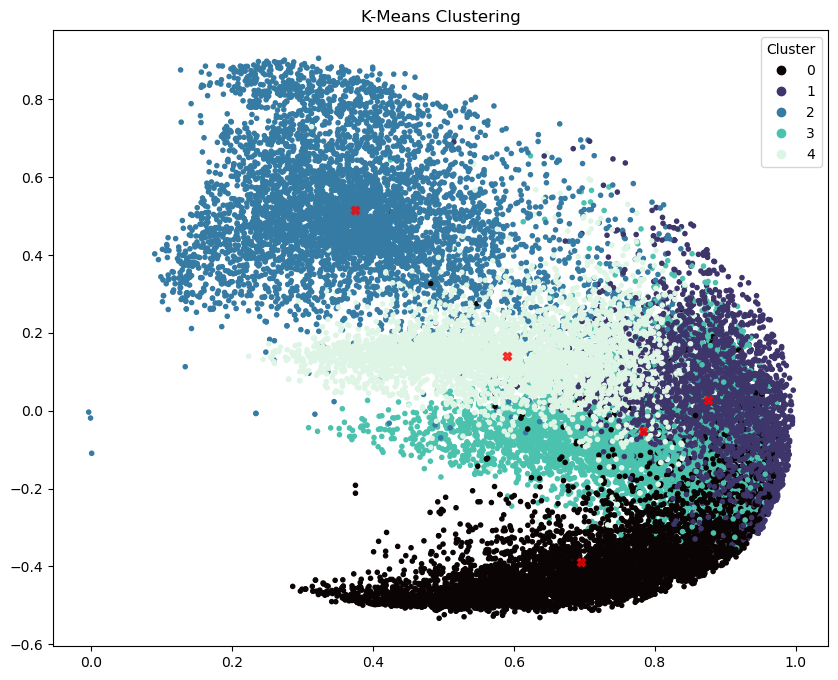

In [114]:
# Visualizing the clusters and centers

plt.figure(figsize=(10, 8))
scatter = plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=clusterlabels, cmap='mako', marker='.', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha=0.75, marker='X', label='Centers')
plt.title('K-Means Clustering')
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusterlabels), title="Cluster");

## Step 4: Tuning the Number of Clusters (K) 
### K-Values Tuning

In [115]:
# Define the range of values for the number of clusters to test
k_values = range(2, 10)

# Initialize lists to store the inertia and silhouette scores for each value of k
inertia = []
silscores = []

# Loop over the range of k values
for i in k_values:
    # Initialize the KMeans model with the current number of clusters
    kmean = KMeans(init='k-means++', n_clusters=i, n_init=12)
    
    # Fit the KMeans model to the normalized data
    kmean.fit(normalized_data)
    
    # Get the labels (cluster assignments) for each point in the data
    labels = kmean.labels_
    
    # Append the inertia (sum of squared distances to the nearest cluster center) to the list
    inertia.append(kmean.inertia_)
    
    # Compute the silhouette score for the current clustering and append it to the list
    silscores.append(silhouette_score(normalized_data, labels, metric="cosine"))

# Output the list of inertia values for each k
inertia

[10307.53267443875,
 6315.917888180431,
 3383.6592945591133,
 2920.787315837445,
 2488.4593097016045,
 2161.0761636121515,
 1945.8186842983855,
 1815.9144195120466]

In [116]:
# Output the list of silscores values for each k
silscores

[0.5333117086194931,
 0.6321585701048358,
 0.7382841772024077,
 0.6413957370121725,
 0.6416314125433085,
 0.625288443031547,
 0.5608464629975292,
 0.5470122346612087]

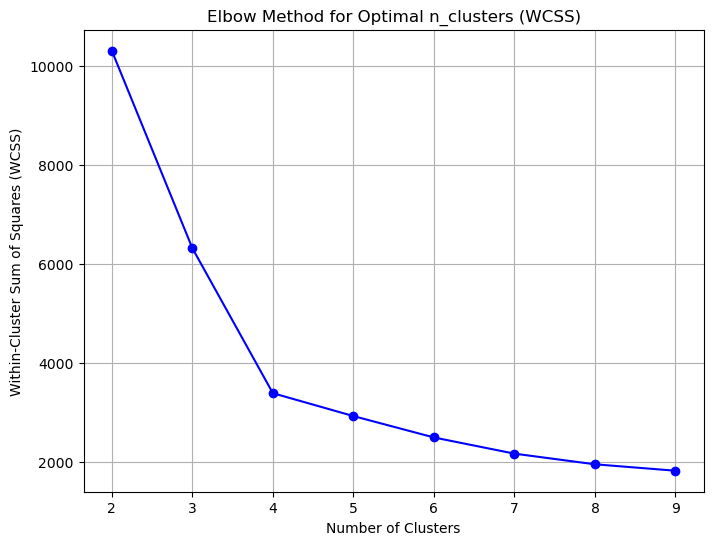

In [117]:
# Plotting elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='blue')

plt.title('Elbow Method for Optimal n_clusters (WCSS)')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

plt.grid(True);

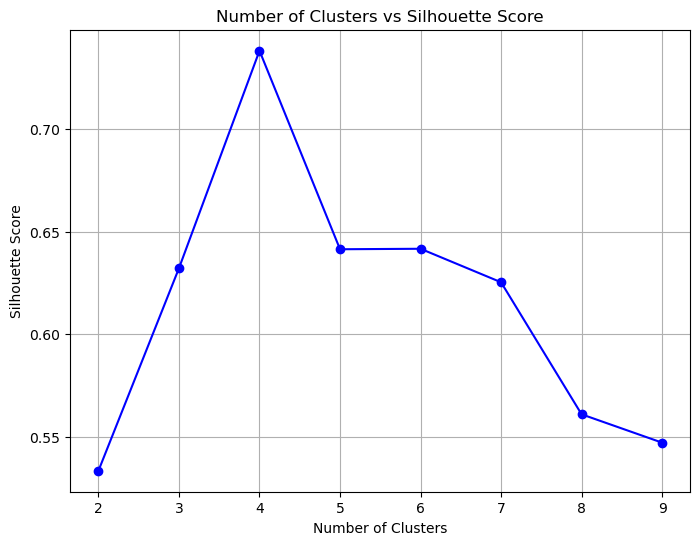

In [118]:
# Plot Number of Clusters against Silhouette Score

plt.figure(figsize=(8, 6))
plt.plot(k_values, silscores, marker='o', linestyle='-', color='blue')

plt.title('Number of Clusters vs Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True);

## Step 5: Final K-Means Model Development
### K-Means Model After Tuning
Since graph above shows other than cluster 4, cluster 5 is the best, we just want to try to see other Silhouette Score other than Euclidean Distance.

In [119]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=12)
kmeans.fit(normalized_data)

KMeans(n_clusters=4, n_init=12)

In [120]:
# The clustering labels for each point in the dataset
clusterlabels = kmeans.labels_

# The cluster centers
centers = kmeans.cluster_centers_

### Extraction of Top Keywords for Each Cluster

In [121]:
# Inverse transform the SVD-reduced cluster centers back to the original TF-IDF feature space
original_space_centers = svd.inverse_transform(centers)

# Get feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to store cluster centers with feature names
df_centers = pd.DataFrame(original_space_centers, columns=feature_names)

# Define the number of top keywords to extract
top_n = 10

# Initialize a dictionary to store the top keywords for each cluster
top_keywords = {}

for i in range(df_centers.shape[0]):
    # Sort the words by their importance in the cluster center
    sorted_keywords = df_centers.iloc[i].sort_values(ascending=False)
    
    # Get the top n keywords
    top_keywords[i] = sorted_keywords.head(top_n).index.tolist()

# Output the top keywords for each cluster
top_keywords

{0: ['book',
  'author',
  'time',
  'life',
  'new',
  'review',
  'world',
  'university',
  'one',
  'story'],
 1: ['steel',
  'set',
  'cm',
  'stainless',
  'home',
  'product',
  'table',
  'size',
  'color',
  'easy'],
 2: ['usb',
  'bluetooth',
  'cable',
  'speaker',
  'camera',
  'device',
  'mm',
  'audio',
  'power',
  'black'],
 3: ['cotton',
  'woman',
  'men',
  'wear',
  'fabric',
  'fit',
  'boy',
  'girl',
  'made',
  'pack']}

### Calculate Silhouette Score

In [122]:
silhouette_kmeans = silhouette_score(normalized_data, clusterlabels)
print("Silhouette Score Euclidean (K-Means):", silhouette_kmeans)

Silhouette Score Euclidean (K-Means): 0.5465377450991389


In [123]:
silhouette_kmeans_cosine = silhouette_score(normalized_data, clusterlabels, metric="cosine")
print("Silhouette Score Cosine (K-Means):", silhouette_kmeans_cosine)

Silhouette Score Cosine (K-Means): 0.7382816401063161


In [124]:
silhouette_kmeans_manhattan = silhouette_score(normalized_data, clusterlabels, metric="manhattan")
print("Silhouette Score Manhattan (K-Means):", silhouette_kmeans_manhattan)

Silhouette Score Manhattan (K-Means): 0.5280045060633832


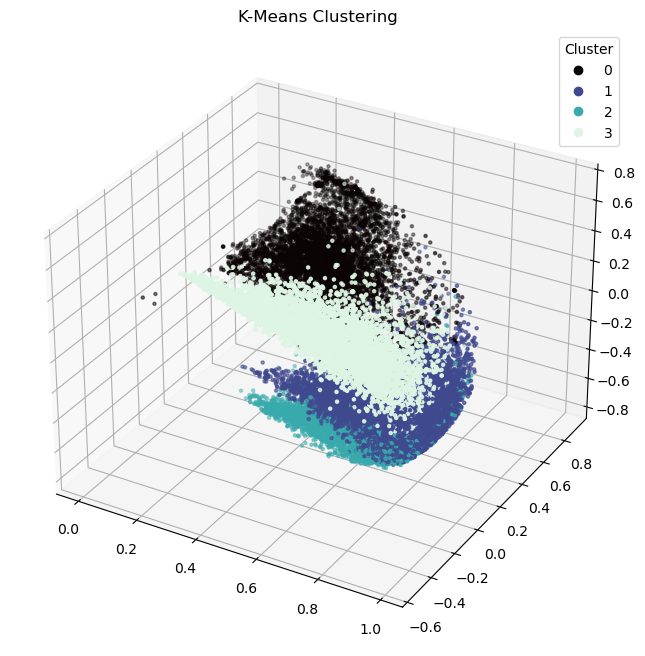

In [125]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three principal components
x = normalized_data[:, 0]
y = normalized_data[:, 1]
z = normalized_data[:, 2]

# Customize the marker style, color, and other plot properties as needed
scatter = ax.scatter(x, y, z, c=clusterlabels, cmap='mako', marker='.')

# Scatter plot for cluster centers
center_x = centers[:, 0]
center_y = centers[:, 1]
center_z = centers[:, 2]
ax.scatter(center_x, center_y, center_z, c='blue', s=100, alpha=1.0, marker='X', label='Centers', zorder=3)

# Set the title
ax.set_title('K-Means Clustering')

# Create a legend
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Cluster");

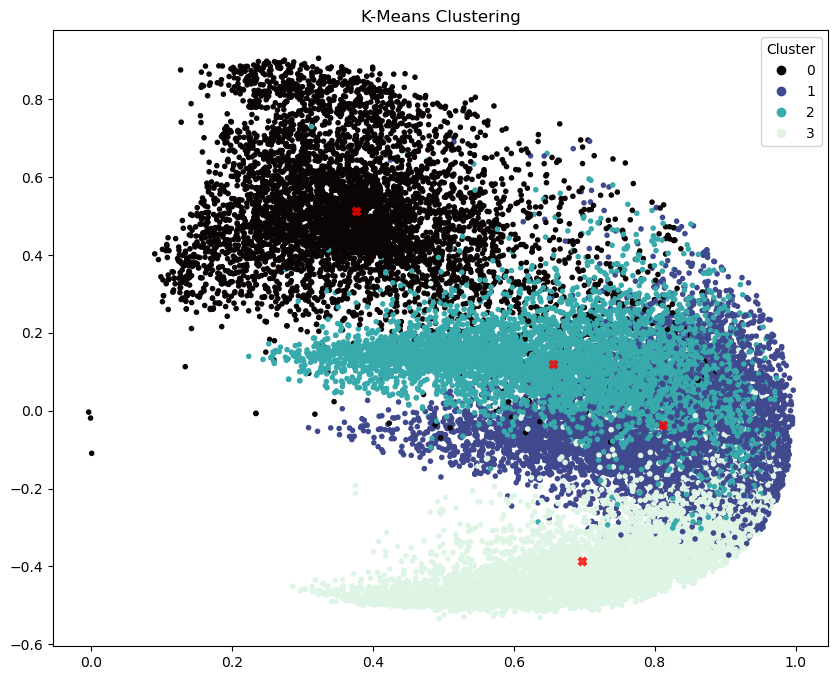

In [126]:
# Visualizing the clusters and centers

plt.figure(figsize=(10, 8))
scatter = plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=clusterlabels, cmap='mako', marker='.', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha=0.75, marker='X', label='Centers')
plt.title('K-Means Clustering')
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusterlabels), title="Cluster");

In [127]:
pd.set_option('display.max_colwidth', None)

df_clustered = pd.DataFrame({'Cluster': clusterlabels, 'Text': df['lemmatized tokens']})
df_clustered

Cluster  \
0            1   
1            1   
2            1   
3            1   
4            1   
...        ...   
27797        2   
27798        2   
27799        2   
27800        2   
27801        2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [128]:
df_clustered['Cluster'].value_counts()

Cluster
1    10375
3     6008
0     5869
2     5550
Name: count, dtype: int64

In [129]:
# FOR CSV
# Define the path where the cleaned DataFrame want to be saved
output_path = 'KMeans_Cluster.csv'

# Export the DataFrame to a CSV file
df_clustered.to_csv(output_path, index=False)

# Display the exported path
print(f"Cleaned csv data has been exported to: {output_path}")

# FOR XLSX
# Define the path where the cleaned DataFrame wants to be saved
output_path = 'KMeans_Cluster.xlsx'

# Export the DataFrame to an Excel file
df_clustered.to_excel(output_path, index=False)

# Display the exported path
print(f"Cleaned xlsx data has been exported to: {output_path}")

Cleaned csv data has been exported to: KMeans_Cluster.csv
Cleaned xlsx data has been exported to: KMeans_Cluster.xlsx


In [2]:
# Read the CSV file into a DataFrame
df_clustered = pd.read_csv('KMeans_Cluster.csv')

# Display the first 5 rows of the DataFrame
df_clustered.head(5)

Cluster                                               Text
0        1  paper plane design framed wall hanging motivat...
1        1  saf floral framed painting wood inch x inch sp...
2        1  saf uv textured modern art print framed painti...
3        1  saf flower print framed painting synthetic inc...
4        1  incredible gift india wooden happy birthday un...

## FINDING INSIGHTS

In this section, we will be indentifying the product categories based on most frequent words. 

### Cluster 0: Books and Literature

This cluster implies that these resources encompass all necessary materials for preparation, including books, online content, practice questions, and more.

In [130]:
# Extract text data for cluster 0
cluster_0_text = df_clustered[df_clustered['Cluster'] == 0]['Text']

# Get 10 random samples from cluster 0
cluster_0_sample = cluster_0_text.sample(10, random_state=1) 

# Print the random samples
print(cluster_0_sample)

15791                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

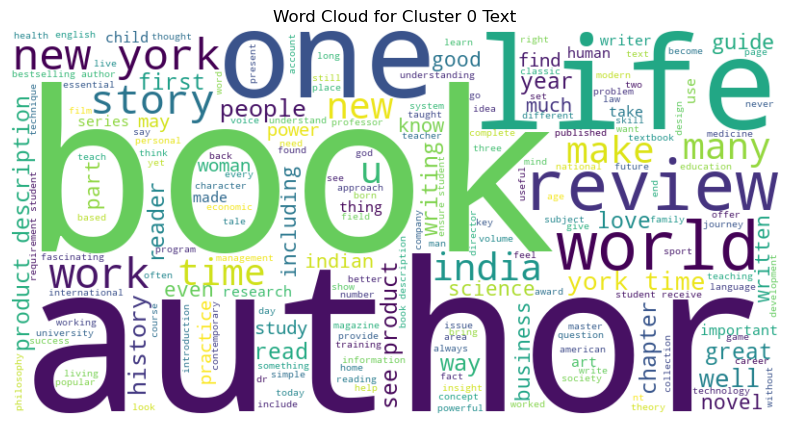

In [131]:
from wordcloud import WordCloud

# Combine all texts in Cluster 0 into a single string
cluster_0_text = df_clustered[df_clustered['Cluster'] == 0]['Text'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_0_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Cluster 0 Text');

In [132]:
# Access word frequencies from the WordCloud object
word_frequencies = wordcloud.words_

# Sort the word frequencies by frequency in descending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Extract and display the top 10 frequent words
top_10_words = sorted_word_frequencies[:10]
print("Top 10 frequent words:")
for word, frequency in top_10_words:
    print(f"{word}: {frequency}")

Top 10 frequent words:
book: 1.0
author: 0.9122197663403853
life: 0.5197347647616041
one: 0.4647931796652984
review: 0.36880328386485633
world: 0.33659614777391855
new york: 0.32207136090937794
work: 0.30944111146195136
story: 0.30091569308493843
india: 0.2510262077676034


### Cluster 1: Housewares

The "Houseware" cluster comprises a diverse range of essential items and products designed for everyday use within residential settings. These products are integral to maintaining and enhancing the functionality, organization, and comfort of homes.

The "Houseware" cluster plays a crucial role in supporting and improving the quality of life at home. By addressing fundamental needs such as cooking, cleaning, organization, and maintenance, it ensures households are well-equipped and functional, promoting a comfortable and enjoyable living experience.

In [133]:
# Extract text data for cluster 1
cluster_1_text = df_clustered[df_clustered['Cluster'] == 1]['Text']

# Get 10 random samples from cluster 1
cluster_1_sample = cluster_1_text.sample(10, random_state=1) 

print(cluster_1_sample)

6442                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           anmsales sunsun jy surface protein skimmer aquarium fish tank filter water tank w lph mtr
5245                                                                                                                                                                                                                                                                                           

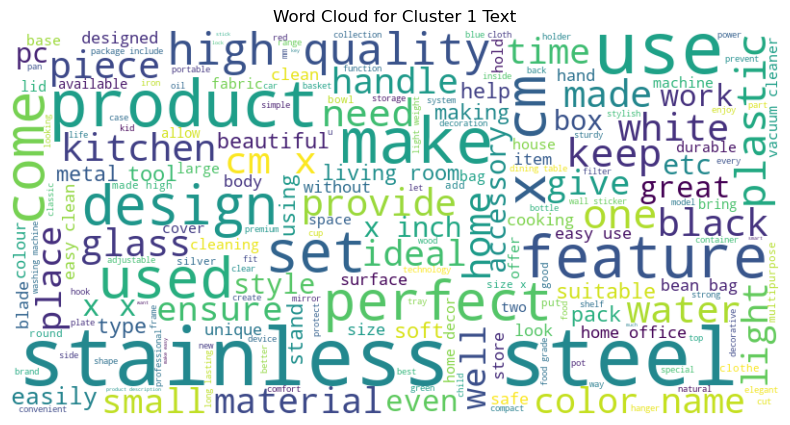

In [134]:
# Combine all texts in Cluster 1 into a single string
cluster_1_text = df_clustered[df_clustered['Cluster'] == 1]['Text'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_1_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Cluster 1 Text');

In [135]:
# Access word frequencies from the WordCloud object
word_frequencies = wordcloud.words_

# Sort the word frequencies by frequency in descending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Extract and display the top 10 frequent words
top_10_words = sorted_word_frequencies[:10]
print("Top 10 frequent words:")
for word, frequency in top_10_words:
    print(f"{word}: {frequency}")

Top 10 frequent words:
stainless steel: 1.0
use: 0.8139442231075698
product: 0.6458167330677291
make: 0.6179282868525896
feature: 0.5278884462151394
set: 0.49721115537848604
come: 0.48725099601593624
used: 0.48047808764940236
design: 0.45976095617529883
x cm: 0.45219123505976094


### Cluster 2: Electronics

This category encompasses a wide range of devices, components, and systems that utilize electrical energy for various applications, including communication, entertainment, and everyday tasks.

It plays a crucial role in modern society by powering essential devices, improving living standards, and driving economic growth through technological innovation. It enables connectivity, automation, and sustainability, contributing to a more interconnected and efficient global community.

In [136]:
# Extract text data for cluster 2
cluster_2_text = df_clustered[df_clustered['Cluster'] == 2]['Text']

# Get 10 random samples from cluster 2
cluster_2_sample = cluster_2_text.sample(10, random_state=2)  
 
print(cluster_2_sample)

26791                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    jbl gto premium x inch coaxial speaker set x inchhighfidelity way car speaker peak power w w rms carboninjected pantented plus one cone non magnetic fiber glass reinforced frame rms power watt db sensitivity
24142    tarkan heavy duty fan led cooling pad suitable upto inch laptop colour blue description notice laptop performance turn sluggish hour working sign telling need cooling fan fashionable unique robust design perfect gadget laptop comf

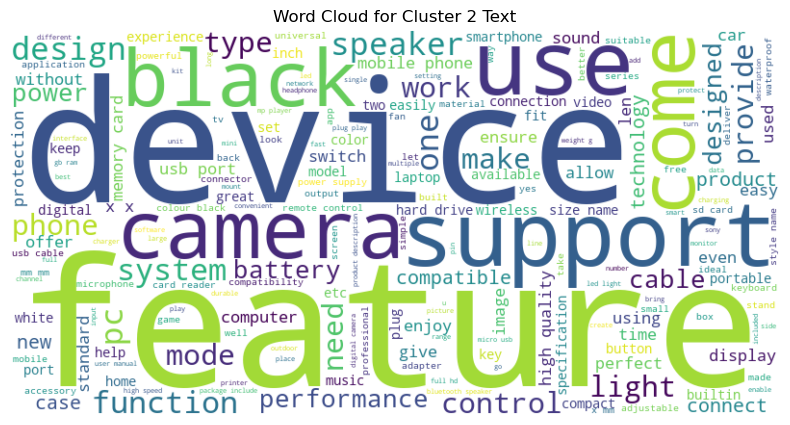

In [137]:
# Combine all texts in Cluster 2 into a single string
cluster_2_text = df_clustered[df_clustered['Cluster'] == 2]['Text'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_2_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Cluster 2 Text');

In [138]:
# Access word frequencies from the WordCloud object
word_frequencies = wordcloud.words_

# Sort the word frequencies by frequency in descending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Extract and display the top 10 frequent words
top_10_words = sorted_word_frequencies[:10]
print("Top 10 frequent words:")
for word, frequency in top_10_words:
    print(f"{word}: {frequency}")

Top 10 frequent words:
feature: 1.0
device: 0.9183253260123542
support: 0.6808510638297872
use: 0.667124227865477
camera: 0.5525051475634866
black: 0.515442690459849
come: 0.5024021962937543
speaker: 0.4886753603294441
one: 0.48112560054907344
design: 0.47975291695264244


### Cluster 3: Fashion and Apparel

This cluster "Fashion Ensemble" embodies the art and creativity of combining various garments, accessories, and styling elements to achieve a harmonious and stylish appearance. It goes beyond individual pieces of clothing to showcase personal expression, creativity, and a keen sense of style.

"Fashion Ensemble" encapsulates the artistry and personal expression inherent in combining clothing and accessories to create stylish and impactful outfits for various occasions and settings.

In [139]:
# Extract text data for cluster 3
cluster_3_text = df_clustered[df_clustered['Cluster'] == 3]['Text']

# Get 10 random samples from cluster 3
cluster_3_sample = cluster_3_text.sample(10, random_state=3) 

print(cluster_3_sample)

18400                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             zacharias unisex poly cotton sock pair product made poly cotton finished attractive set color furthermore recommended kept away extreme heat fire corrosive liquid avoid form damage
21455                                                                                                                                                                            

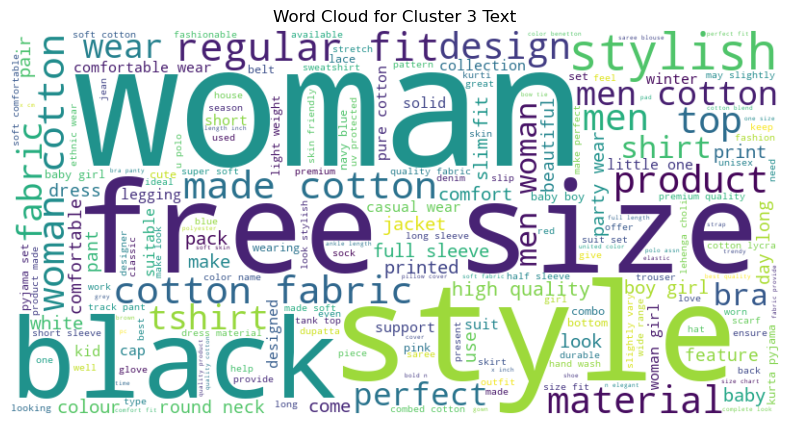

In [140]:
# Combine all texts in Cluster 3 into a single string
cluster_3_text = df_clustered[df_clustered['Cluster'] == 3]['Text'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_3_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Cluster 3 Text');

In [141]:
# Access word frequencies from the WordCloud object
word_frequencies = wordcloud.words_

# Sort the word frequencies by frequency in descending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Extract and display the top 10 frequent words
top_10_words = sorted_word_frequencies[:10]
print("Top 10 frequent words:")
for word, frequency in top_10_words:
    print(f"{word}: {frequency}")

Top 10 frequent words:
woman: 1.0
style: 0.588957055214724
free size: 0.5051124744376279
black: 0.4550102249488753
stylish: 0.4396728016359918
regular fit: 0.4386503067484663
made cotton: 0.42433537832310836
cotton fabric: 0.41922290388548056
woman cotton: 0.4161554192229039
top: 0.40286298568507156
